# Part 1, exploratory data analysis (EDA)

# Winner winner chicken dinner

Вопросы:

1. [2 балла] Загрузка и предобработка данных - загрузите датасет, посмотрите на его `head` и `tail`. Похоже, у нас есть одна лишняя переменная - tracker_id, которая совершенно не информативна, давайте сразу её уберем. После этого воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T`. 
2. [1 балл] Каково максимальное число соло-побед в датасете? А дуо? 
3. [1 балл] Какое максимальное число соло-убийств совершили игроки?
4. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Размер можно задать figsize=(22, 20)
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 30).
6. [2 балла] Визуализация - сделайте  срез датасета, в котором будут только такие строчки, в которых число соло-побед больше 10. При помощи `.plot.scatter` постройте график, где по оси x будет винрейт соло, а по оси y - винрейт в команде (squad_WinRatio). Можно ли по графику утверждать, что чем выше винрейт игрока в соло играх, тем больше у него винрейт в команде (или наоборот)?
7. [2 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать какой-нибудь осмысленный вопрос или визуализацию для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 10 баллов, отлично!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению
Отлично, с загрузкой справились :) 

In [3]:
data = pd.read_csv ('F:/Data/Makarov_Arseny_PUBG_Player_Statistics.csv')
data

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
5,coldoxygen,33313,5.73,31.25,22003.22,16,5,0.50,10,62.5,...,3218436.00,4733977.00,2078.93,4414.86,1212.76,2023,195,2307,238640.00,1450
6,Giken,15585,2.45,8.45,148051.25,142,12,0.18,34,23.9,...,2057423.12,2883099.31,1664.77,3022.51,564.20,1274,133,1320,132008.88,775
7,KoreaNo1,9454,2.71,26.32,26091.14,19,5,0.50,10,52.6,...,3586593.00,4854387.00,1635.86,4627.86,806.24,2199,163,1864,201659.00,1287
8,undor,24029,3.68,13.64,49282.41,44,6,0.23,13,29.5,...,1054263.00,1550975.00,2207.61,4685.61,455.67,617,61,585,80498.73,513
9,Fordune,11289,4.17,25.00,10280.77,8,2,0.25,4,50.0,...,2793909.91,4071039.87,1981.29,3635.28,546.95,1320,220,1338,123573.74,675


In [4]:
# убираем лишнюю переменную tracker_id
data = data.drop(['tracker_id'], axis=1)

In [5]:
data.head()

,player_name,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


In [6]:
data.tail()

,player_name,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
87893,SaikoMene,1.05,0.00,48273.92,62,0,0.00,5,8.1,62,...,105321.37,211421.17,1863.11,1503.24,489.84,136,15,70,7285.37,41
87894,KARUKOR,1.61,4.65,49006.75,43,2,0.22,9,20.9,41,...,98108.14,242154.75,1636.41,1590.67,235.24,143,26,72,14440.64,97
87895,Dertydann,1.00,0.00,14272.20,16,0,0.00,1,6.2,16,...,177062.72,384254.27,2109.40,1088.12,453.87,157,24,95,15939.11,92
87896,Neferhor,5.10,16.67,58518.86,48,8,0.44,18,37.5,40,...,523052.83,853232.16,1785.15,1804.51,449.91,397,39,317,56870.07,350
87897,pepperedangus,0.83,1.38,198473.81,217,3,0.03,31,14.3,214,...,241667.55,500604.73,1638.83,1413.55,363.74,154,28,150,19769.59,140


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
solo_KillDeathRatio,87898.0,1.865855,1.776301,0.00,1.0300,1.470,2.1400,100.00
solo_WinRatio,87898.0,5.017506,10.077138,0.00,0.0000,2.000,5.5600,100.00
solo_TimeSurvived,87898.0,69715.705692,80408.606561,76.10,17897.0475,45173.335,92462.6450,1521200.13
solo_RoundsPlayed,87898.0,79.275342,96.947859,1.00,17.0000,48.000,105.0000,1681.00
solo_Wins,87898.0,2.080093,3.394513,0.00,0.0000,1.000,3.0000,106.00
solo_WinTop10Ratio,87898.0,0.179251,0.217444,0.00,0.0000,0.110,0.2500,1.00
solo_Top10s,87898.0,12.106282,14.694722,0.00,4.0000,8.000,15.0000,386.00
solo_Top10Ratio,87898.0,20.667335,16.181078,0.00,10.8000,16.700,25.9000,100.00
solo_Losses,87898.0,77.195249,95.545156,0.00,16.0000,46.000,102.0000,1673.00
solo_Rating,87898.0,1768.627033,348.721933,984.58,1477.2325,1754.210,2041.1375,2967.09


### Комментарий к решению
Всё верно :)

In [8]:
print ('Самое большое количество побед в одиночном режиме -', data.solo_Wins.max())

Самое большое количество побед в одиночном режиме - 106


In [9]:
print ('Самое большое количество побед в режиме "дуо" -', data.duo_Wins.max())

Самое большое количество побед в режиме "дуо" - 152


In [14]:
print ('Больше всего в одиночном режиме было убито', data.solo_KillsPg.max(), 'игроков за одну игру')

Больше всего в одиночном режиме было убито 20.0 игроков за одну игру


### Комментарий к решению
Явно часть данных у нас сильно скоррелирована

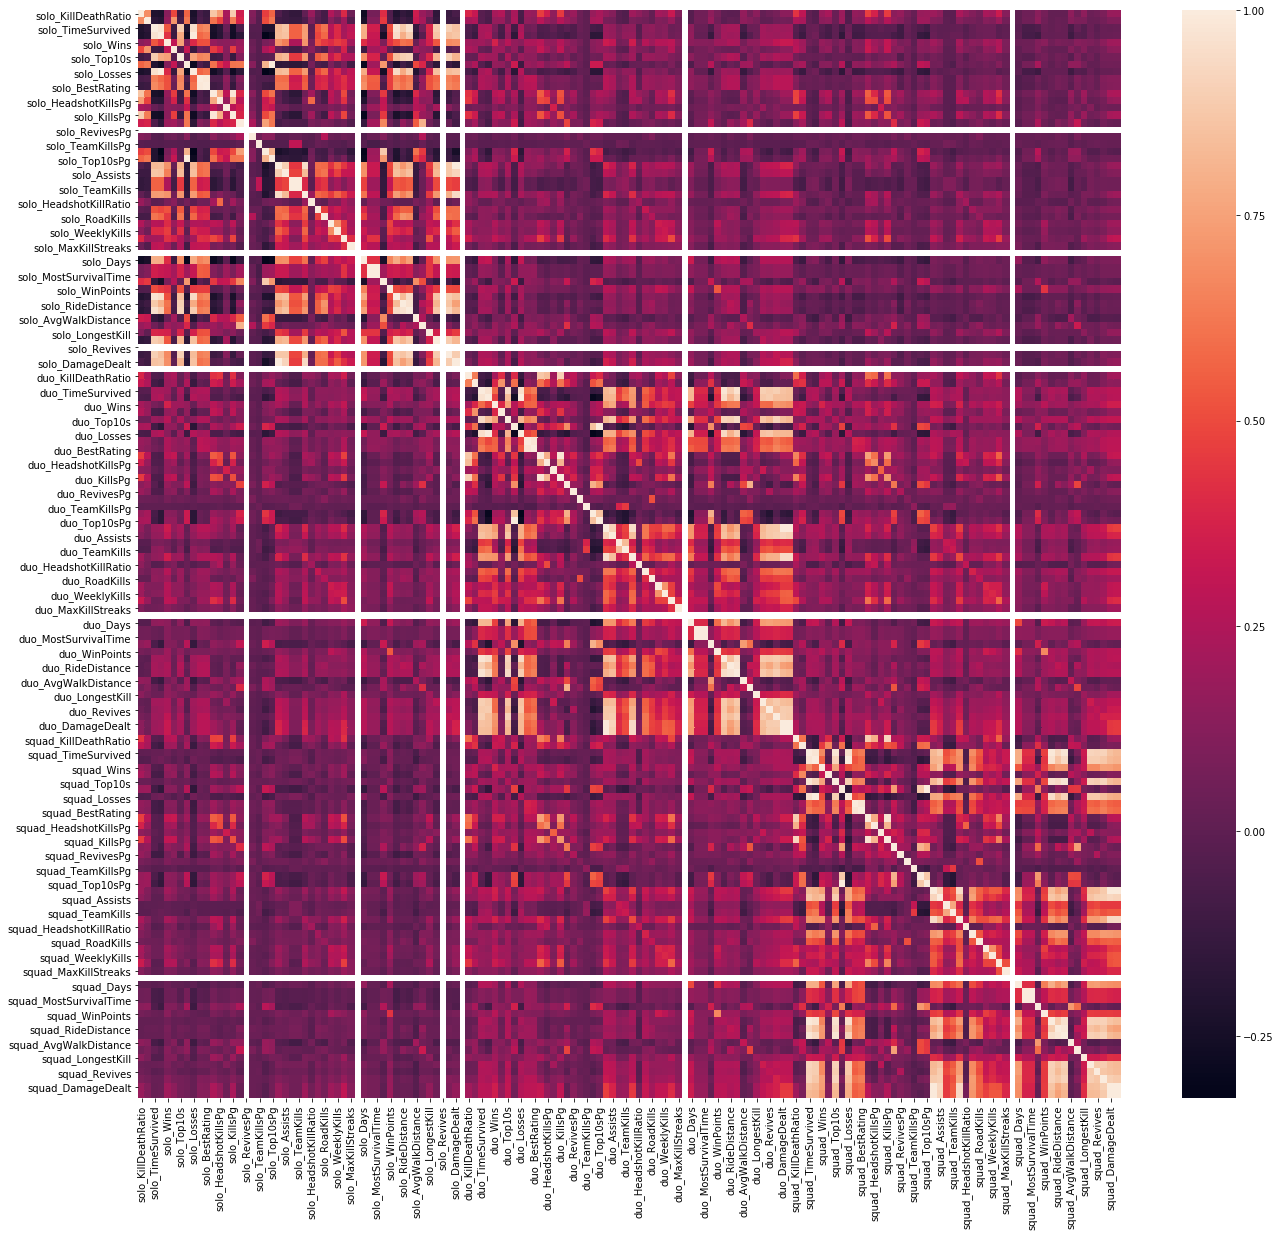

In [11]:
fig, ax = plt.subplots(figsize=(22,20)) 
ax = sns.heatmap(data = data.corr());

### Комментарий к решению
А некоторые распределения близки к константе, возможно, эти признаки придется повыкидывать

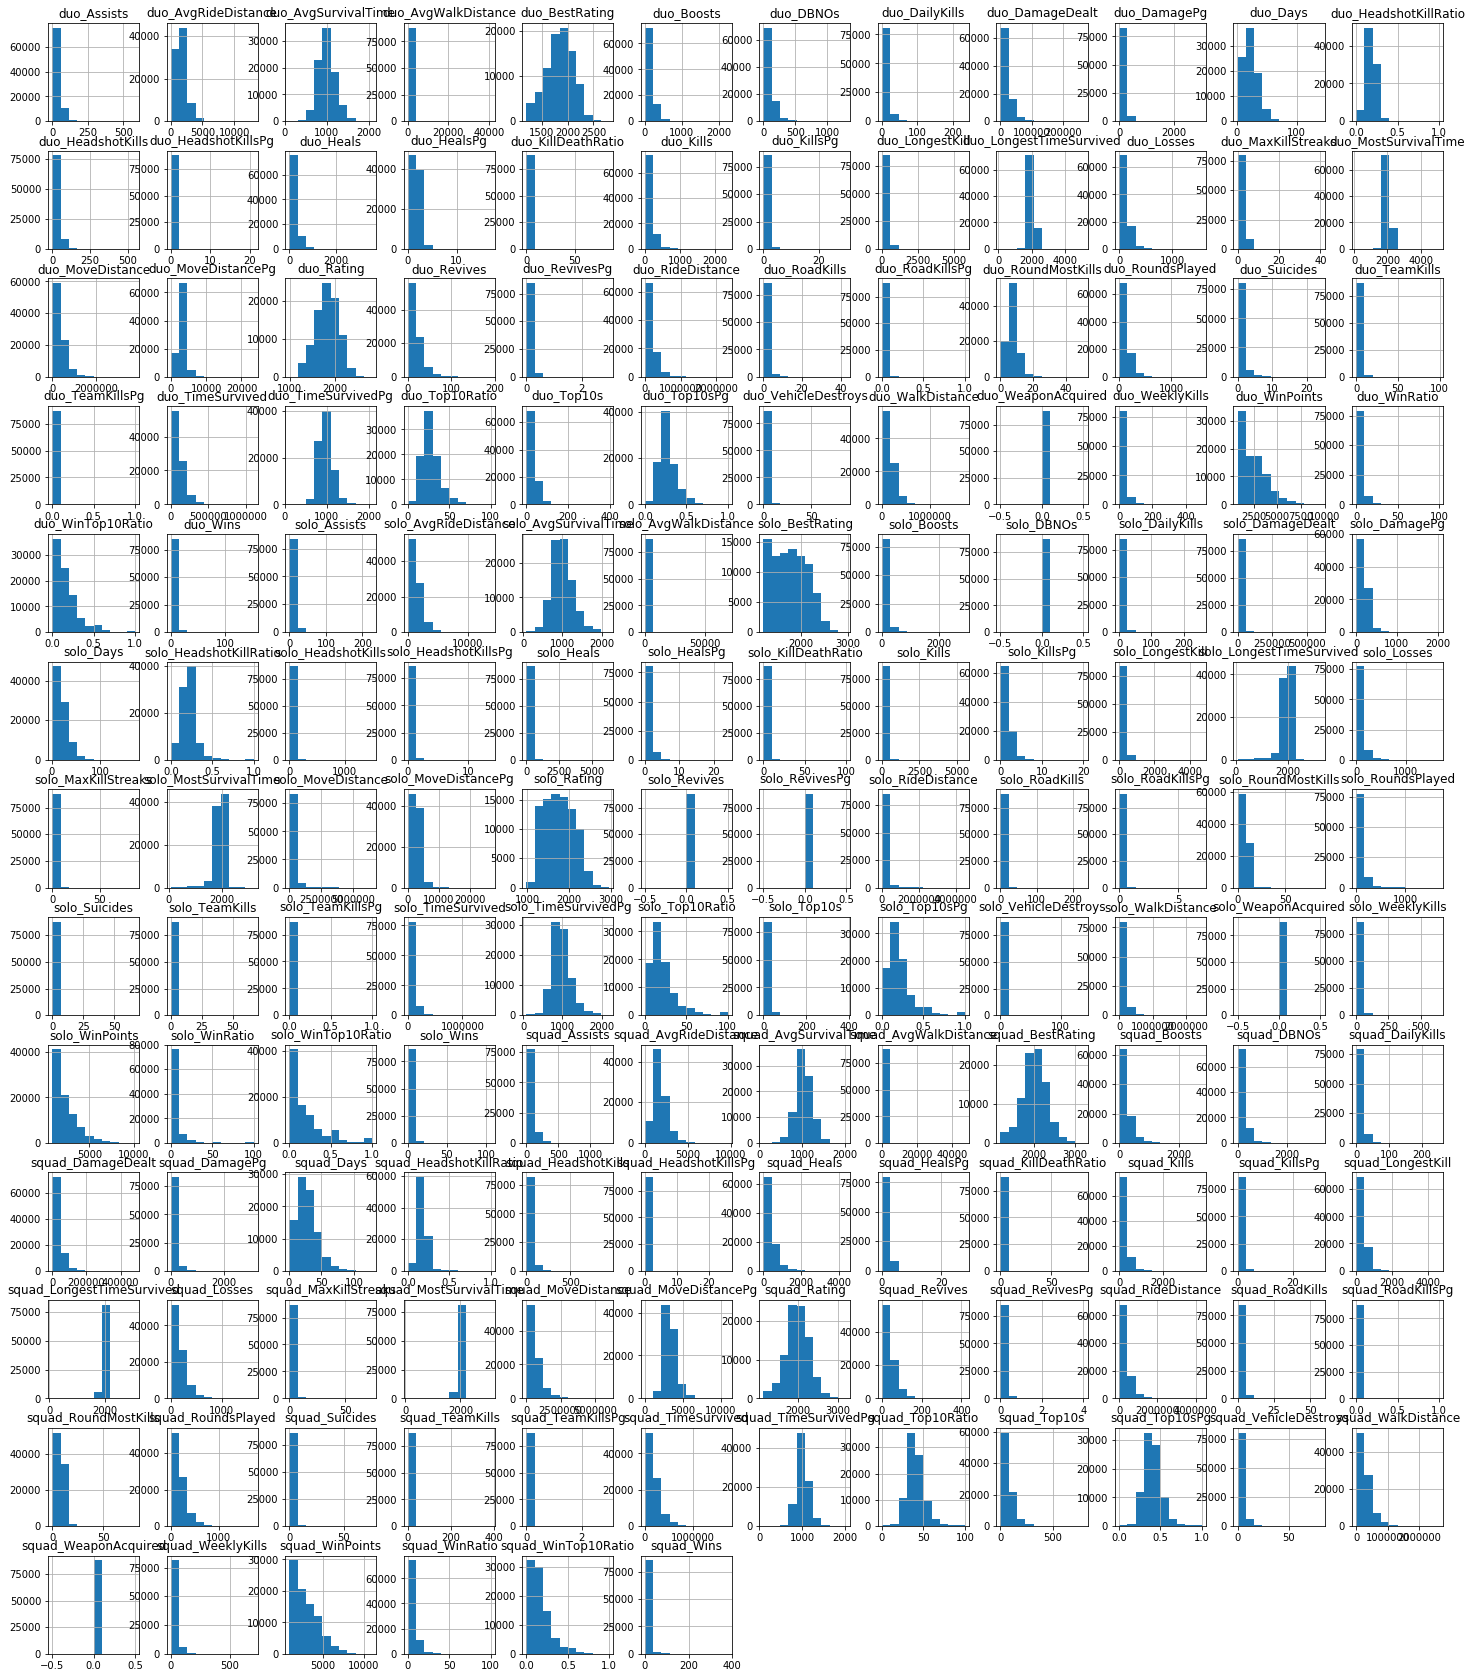

In [12]:
data.hist(figsize=(25, 30));

### Комментарий к решению
Хах, действительно зависимость еще очевиднее, если ~~смотреть на задротов~~ увеличивать число побед

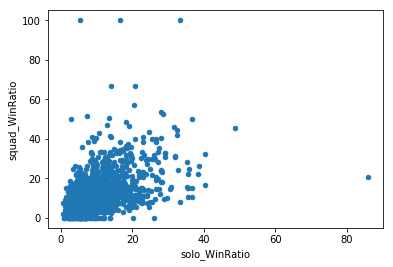

In [41]:
data[data['solo_Wins'] > 10].plot.scatter(x='solo_WinRatio', y='squad_WinRatio');

***
При рассматривании игроков с числом побед больше 10 видно, что зависимость существует

__Но__

Она станет более четкой, если поднять минимальное количество побед до 35, включая в наблюдение ~~задротов~~ более опытных игроков


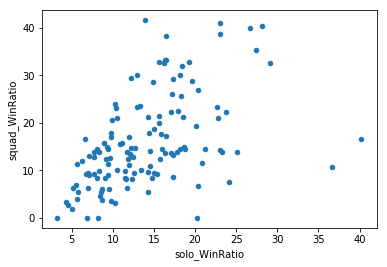

In [44]:
data[data['solo_Wins'] > 35].plot.scatter(x='solo_WinRatio', y='squad_WinRatio');

Однозначно можно сказать, что чем __больше__ винрейт в *"соло"* играх, тем __больше__ он в *"сквадах"*
***

### Комментарий к решению
Редко, но метко - неплохо ;)

***
Теперь можно проверить зависимость % хедшотов от еженедельной активности игрока

Возьмем лишь тех, у кого побед в одиночном режиме __больше 25__

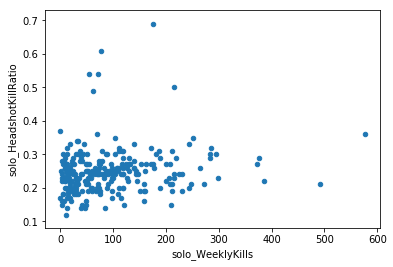

In [96]:
data[data['solo_Wins'] > 25].plot.scatter(x='solo_WeeklyKills', y='solo_HeadshotKillRatio');

На графике видно, что, в среднем, процент убийств в голову растет с увеличением количества убийств еженедельно, однако также есть игроки, которые играют _редко, но метко_        
***